Панова Дарья 11 вариант

Цель работы: изучить рекурсивные алгоритмы и рекурсивные структуры данных; научиться анализировать итеративные и рекурсивные процедуры; исследовать эффективность итеративных и рекурсивных процедур при реализации на ПЭВМ

Лабораторная работа 6.  Итеративные и рекурсивные алгоритмы

In [2]:
import math
import sys
sys.setrecursionlimit(2000)

Реализуйте алгоритм вычисления суммы с помощью рекурсии $$ y(x,i) = \sin x + \sin(\sin x) + \ldots + \sin(\sin \ldots (\sin x)), \qquad i = 1,2,\ldots, n$$

In [3]:
def y(x, i):
    if i == 1:
        return math.sin(x)
    return math.sin(x) + y(math.sin(x), i - 1)

x = float(input("Введите значение x: "))
n = int(input("Введите количество итераций n: "))
result = y(x, n)
print(f"Результат y({x}, {n}) = {result}")

Введите значение x:  1
Введите количество итераций n:  5


Результат y(1.0, 5) = 3.4802784324567844


Реализуйте алгоритм вычисления суммы без рекурсии $$ y(x,i) = \sin x + \sin(\sin x) + \ldots + \sin(\sin \ldots (\sin x)), \qquad i = 1,2,\ldots, n$$


In [4]:
def y_no_recursive(x, n):
    result = 0
    current = x  
    for _ in range(n):
        current = math.sin(current)  
        result += current  
    return result


x = float(input("Введите значение x: "))
n = int(input("Введите количество итераций n: "))
result = y_no_recursive(x, n)
print(f"Результат y({x}, {n}) = {result}")

Введите значение x:  1
Введите количество итераций n:  5


Результат y(1.0, 5) = 3.480278432456785


Работает нормально для 𝑛< 900 (или 𝑛<1000 на некоторых системах).

Модернизируйте рекурсивную реализацию таким образом, чтобы сохранялись промежуточные результаты вызова рекурсии (реализуйте подобный механизм вручную, а также с помощью декоратора);

In [5]:
def y_memo(x, i, memo=None):
    if memo is None:
        memo = {}
    # Проверка наличия результата в memo
    if (x, i) in memo:
        return memo[(x, i)]
   
    if i == 1:
        result = math.sin(x)
    else:
        result = math.sin(x) + y_memo(math.sin(x), i - 1, memo)
    memo[(x, i)] = result  
    return result

x = float(input("Введите значение x: "))
n = int(input("Введите количество итераций n: "))
result = y(x, n)
print(f"Результат y({x}, {n}) = {result}")

Введите значение x:  1
Введите количество итераций n:  5


Результат y(1.0, 5) = 3.4802784324567844


In [6]:
def cache_results(func):
    cache = {}

    def wrapper(x, i):
        if (x, i) in cache:  # Проверяем наличие результата в кэше
            return cache[(x, i)]
        result = func(x, i)
        cache[(x, i)] = result  # Сохраняем результат в кэш
        return result
    return wrapper


@cache_results
def y_cached(x, i):
    # Базовый случай
    if i == 1:
        return math.sin(x)
    # Рекурсивный случай
    return math.sin(x) + y_cached(math.sin(x), i - 1)

# Пример использования
x = float(input("Введите значение x: "))
n = int(input("Введите количество итераций n: "))
result = y_cached(x, n)
print(f"Результат y_cached({x}, {n}) = {result}")

Введите значение x:  1
Введите количество итераций n:  5


Результат y_cached(1.0, 5) = 3.4802784324567844


Сравнение производительности реализованнных алгоритмов

In [14]:
import time
def measure_time(func, x, n):
    start_time = time.time()
    result = func(x, n)
    end_time = time.time()
    return result, end_time - start_time

# Примерные значения x и n
x = 1.0  # Пример значения x
n = 900  # Примерное значение n, близкое к лимиту стека

# Измеряем время для всех реализаций
try:
    result, time_original = measure_time(y, x, n)
    print(f"Оригинальная реализация: результат = {result:.4f}, время = {time_original:.4f} сек")
except RecursionError:
    print("Оригинальная реализация: переполнение стека")

result, time_memo_manual = measure_time(lambda x, n: y_memo(x, n), x, n)
print(f"Ручное кеширование: результат = {result:.4f}, время = {time_memo_manual:.4f} сек")

result, time_memo_decorator = measure_time(lambda x, n: y_cached(x, n), x, n)
print(f"Кеширование через декоратор: результат = {result:.4f}, время = {time_memo_decorator:.4f} сек")

Оригинальная реализация: результат = 96.6523, время = 0.0010 сек
Ручное кеширование: результат = 96.6523, время = 0.0029 сек
Кеширование через декоратор: результат = 96.6523, время = 0.0000 сек


Блок-схема

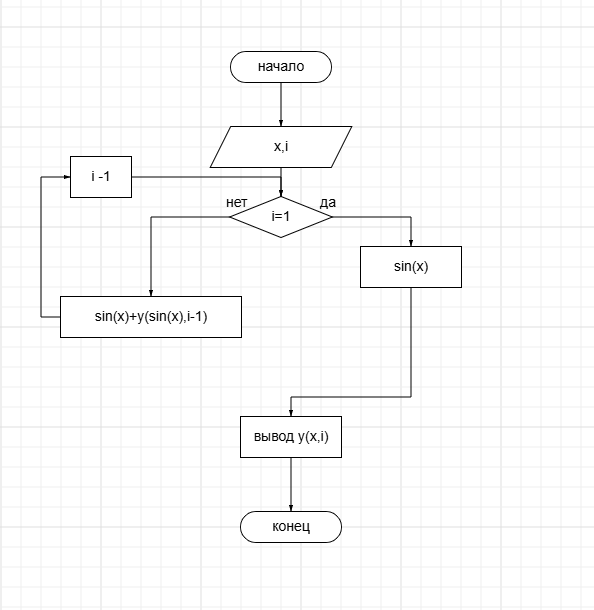